In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder
from sklearn.model_selection import learning_curve


In [2]:
df = pd.read_csv("Student Depression Dataset.csv")
df

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,No,1


# EDA

## CORR MATRIX

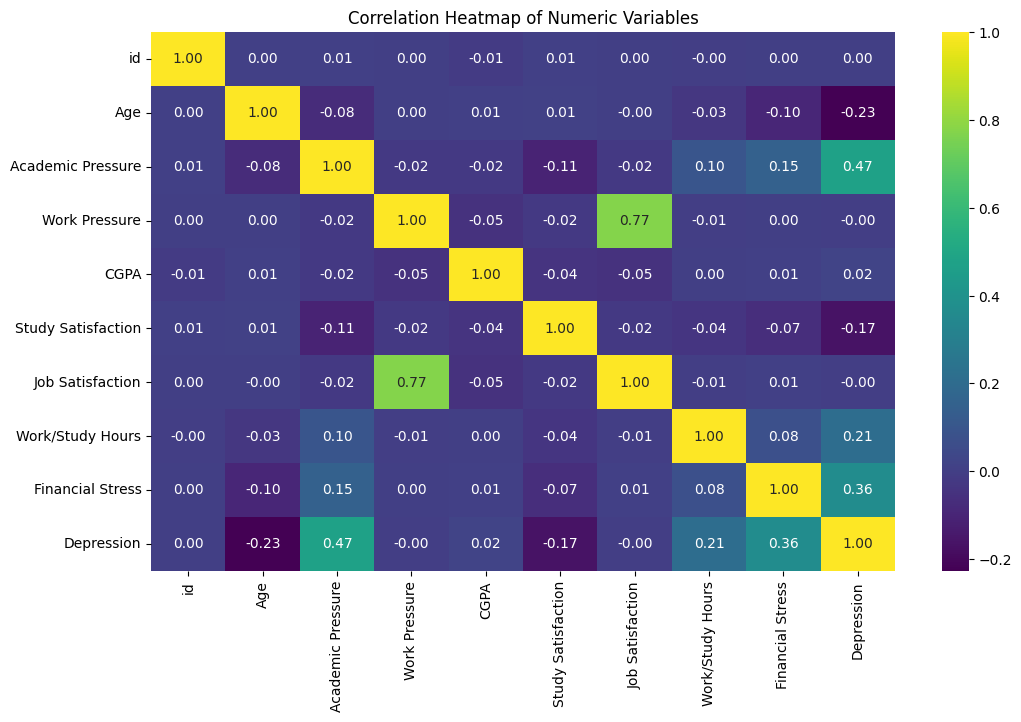

In [3]:
# Correlation Heatmap
plt.figure(figsize=(12, 7))
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

## DATA DESCRIBE

In [4]:
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27898.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,3.139867,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,1.437347,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


In [5]:
for column in df.columns:
    print(f"\n=== Analisis untuk {column} ===")
    if df[column].dtype in ['int64', 'float64']:
        print(df[column].describe())
    else:
        print(df[column].value_counts())


=== Analisis untuk id ===
count     27901.000000
mean      70442.149421
std       40641.175216
min           2.000000
25%       35039.000000
50%       70684.000000
75%      105818.000000
max      140699.000000
Name: id, dtype: float64

=== Analisis untuk Gender ===
Gender
Male      15547
Female    12354
Name: count, dtype: int64

=== Analisis untuk Age ===
count    27901.000000
mean        25.822300
std          4.905687
min         18.000000
25%         21.000000
50%         25.000000
75%         30.000000
max         59.000000
Name: Age, dtype: float64

=== Analisis untuk City ===
City
Kalyan                1570
Srinagar              1372
Hyderabad             1340
Vasai-Virar           1290
Lucknow               1155
Thane                 1139
Ludhiana              1111
Agra                  1094
Surat                 1078
Kolkata               1066
Jaipur                1036
Patna                 1007
Visakhapatnam          969
Pune                   968
Ahmedabad              951

 ## Plot rasio kelas (Deteksi Outlier)

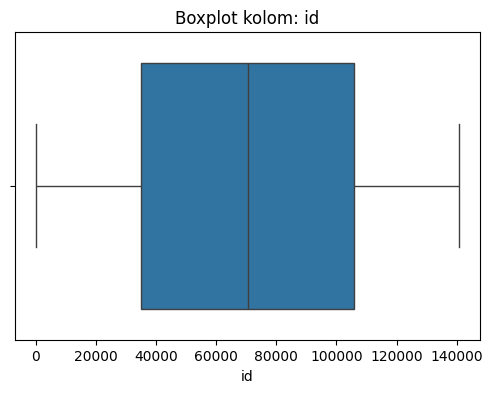

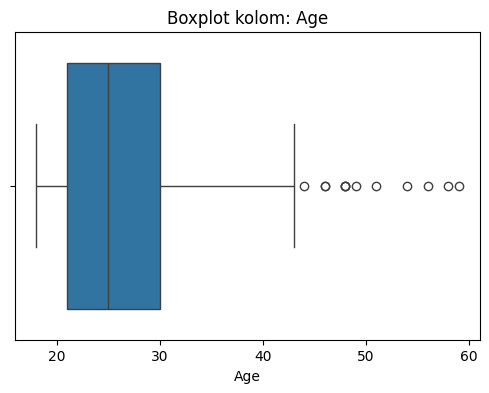

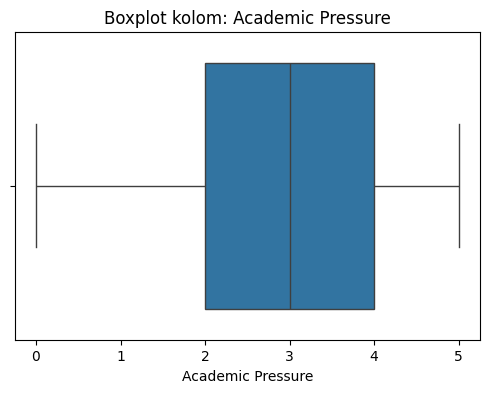

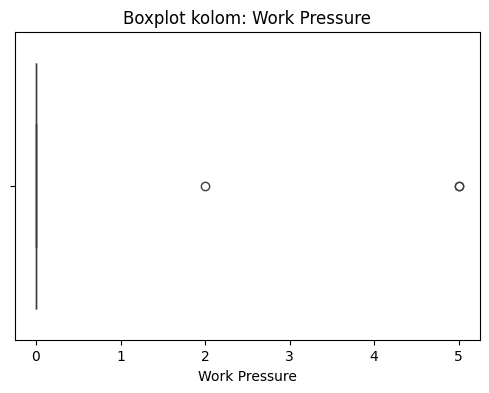

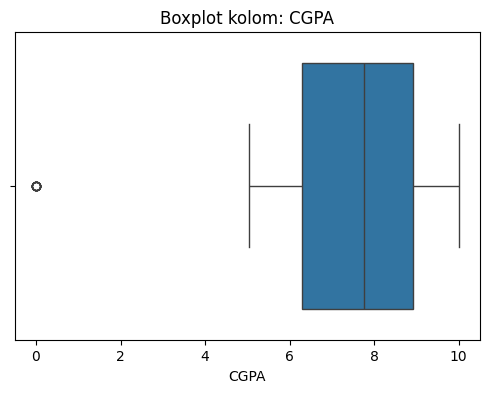

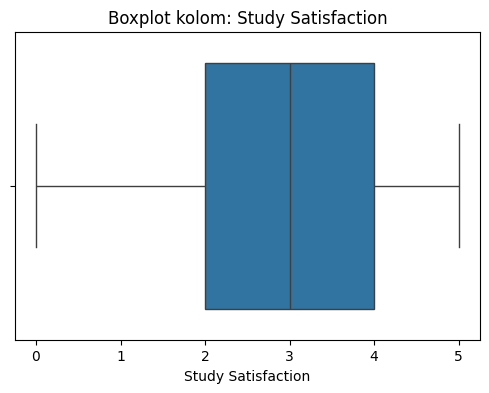

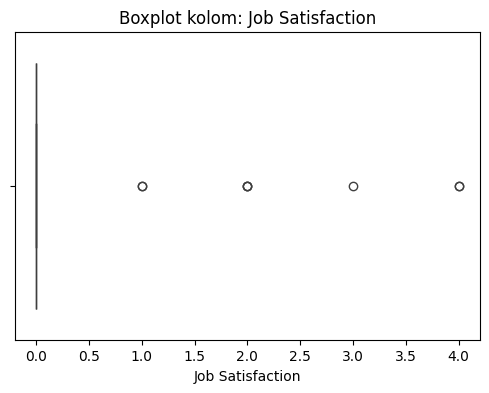

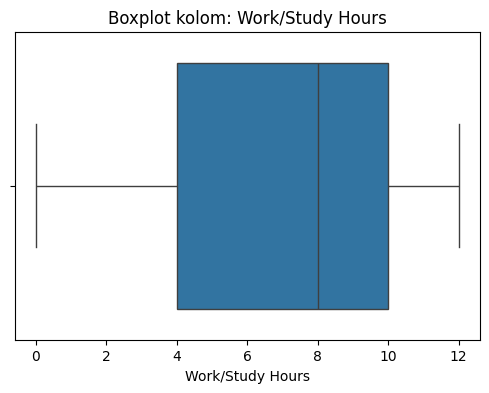

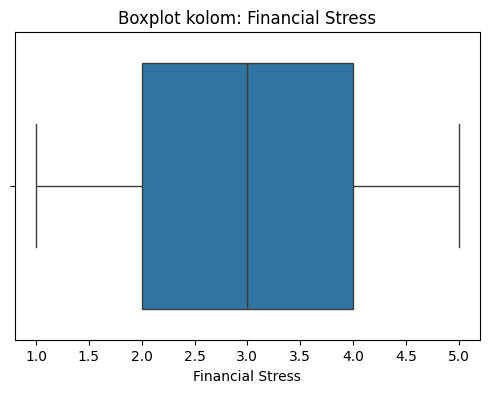

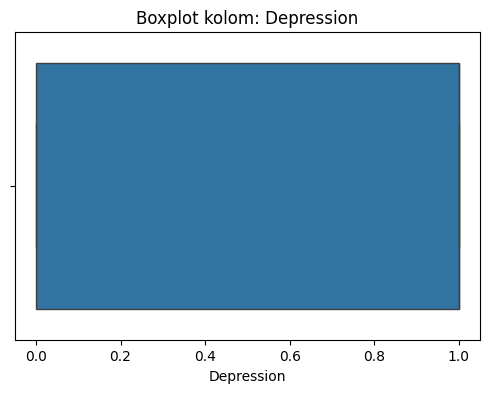

Jumlah outlier di kolom id: 0
Jumlah outlier di kolom Age: 12
Jumlah outlier di kolom Academic Pressure: 0
Jumlah outlier di kolom Work Pressure: 3
Jumlah outlier di kolom CGPA: 9
Jumlah outlier di kolom Study Satisfaction: 0
Jumlah outlier di kolom Job Satisfaction: 8
Jumlah outlier di kolom Work/Study Hours: 0
Jumlah outlier di kolom Financial Stress: 0
Jumlah outlier di kolom Depression: 0


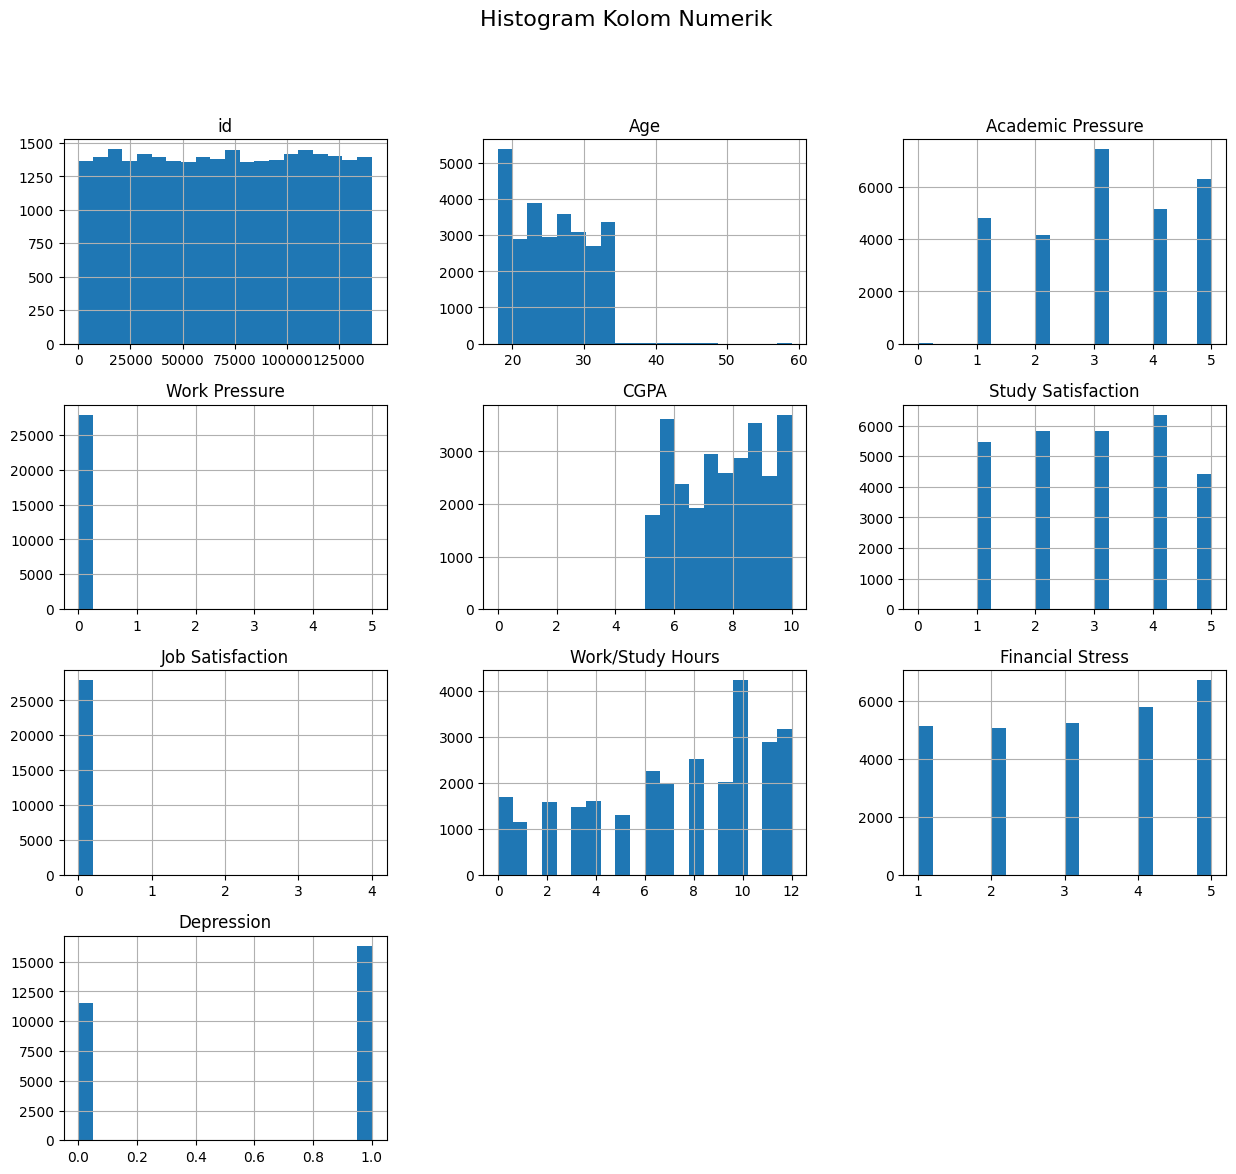

In [6]:
# Memeriksa outlier (menggunakan boxplot)
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot kolom: {col}')
    plt.show()

# Deteksi outlier dengan metode IQR
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
    print(f"Jumlah outlier di kolom {col}: {outliers.shape[0]}")

# Plot rasio kelas (misal kolom target = 'label')
if 'label' in df.columns:
    plt.figure(figsize=(5, 4))
    sns.countplot(x='label', data=df)
    plt.title('Distribusi Kelas')
    plt.show()

    class_ratio = df['label'].value_counts(normalize=True)
    print("Rasio kelas (%):")
    print((class_ratio * 100).round(2))

# Histogram sebaran kolom numerik
df[numeric_cols].hist(figsize=(15, 13), bins=20)
plt.suptitle('Histogram Kolom Numerik', fontsize=16)
plt.show()

## Perbandingan jumlah data setiap kelas (Depression Y/N)

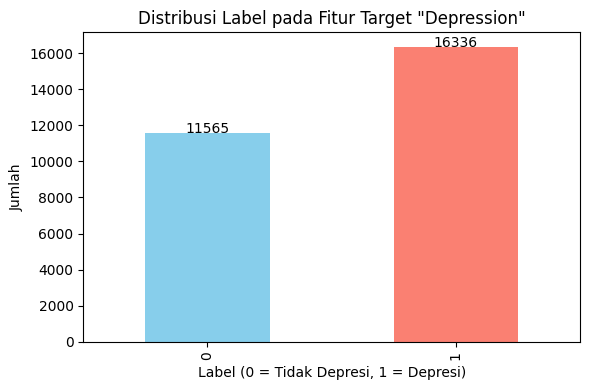

In [7]:
# Hitung jumlah masing-masing label
label_counts = df['Depression'].value_counts().sort_index()

# Plot bar chart
plt.figure(figsize=(6, 4))
label_counts.plot(kind='bar', color=['skyblue', 'salmon'])

# Judul dan label sumbu
plt.title('Distribusi Label pada Fitur Target "Depression"')
plt.xlabel('Label (0 = Tidak Depresi, 1 = Depresi)')
plt.ylabel('Jumlah')

# Tampilkan angka di atas bar
for i, count in enumerate(label_counts):
    plt.text(i, count + 1, str(count), ha='center')

plt.tight_layout()
plt.show()

# PRE PROCESSING

In [8]:
# Memeriksa data duplikat
duplicate_rows = df[df.duplicated()]
print(f"Jumlah data duplikat: {duplicate_rows.shape[0]}")

Jumlah data duplikat: 0


In [9]:
# Memeriksa missing value
df.isna().sum()

,0
id,0
Gender,0
Age,0
City,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0


In [10]:
# Handling missing value kolom "Financial Stress" with Modus
df['Financial Stress'] = df['Financial Stress'].fillna(df['Financial Stress'].mode()[0])

In [11]:
# Ambil profesi student saja
df = df[df['Profession'] == 'Student']

In [12]:
# Drop kolom yang tidak diperlukan
df = df.drop(columns=['id', 'City', 'Work Pressure', 'Job Satisfaction', 'Profession'])

In [13]:
df.head()

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,5.0,8.97,2.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,2.0,5.90,5.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,3.0,7.03,5.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,3.0,5.59,2.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,4.0,8.13,3.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [14]:
df['Degree'].unique()

array(['B.Pharm', 'BSc', 'BA', 'BCA', 'M.Tech', 'PhD', 'Class 12', 'B.Ed',
       'LLB', 'BE', 'M.Ed', 'MSc', 'BHM', 'M.Pharm', 'MCA', 'MA', 'B.Com',
       'MD', 'MBA', 'MBBS', 'M.Com', 'B.Arch', 'LLM', 'B.Tech', 'BBA',
       'ME', 'MHM', 'Others'], dtype=object)

In [15]:
df['Dietary Habits'].unique()

array(['Healthy', 'Moderate', 'Unhealthy', 'Others'], dtype=object)

In [16]:
# Ordinal Encoding untuk Sleep Duration
sleep_order = [['Less than 5 hours', '5-6 hours', '7-8 hours', 'More than 8 hours', 'Others']]
df['Sleep Duration'] = OrdinalEncoder(categories=sleep_order).fit_transform(df[['Sleep Duration']])

# Ordinal Encoding untuk Dietary Habits
diet_order = [['Unhealthy', 'Moderate', 'Healthy', 'Others']]
df['Dietary Habits'] = OrdinalEncoder(categories=diet_order).fit_transform(df[['Dietary Habits']])

# Ordinal Encoding untuk Degree
def map_degree(degree):
    if isinstance(degree, str):
        if degree.startswith('B'):
            return 1
        elif degree.startswith('M'):
            return 2
    return 0  # untuk 'Others' atau missing
df['Degree'] = df['Degree'].apply(map_degree)

In [17]:
# Mengonversi kolom kategorikal menjadi variabel dummy (one-hot encoding),
# dan menghilangkan kolom pertama dari setiap kategori untuk menghindari dummy
df = pd.get_dummies(df, columns=['Gender', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness'], drop_first=True)

In [18]:
df.head()

,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Work/Study Hours,Financial Stress,Depression,Gender_Male,Have you ever had suicidal thoughts ?_Yes,Family History of Mental Illness_Yes
0,33.0,5.0,8.97,2.0,1.0,2.0,1,3.0,1.0,1,True,True,False
1,24.0,2.0,5.90,5.0,1.0,1.0,1,3.0,2.0,0,False,False,True
2,31.0,3.0,7.03,5.0,0.0,2.0,1,9.0,1.0,0,True,False,True
3,28.0,3.0,5.59,2.0,2.0,1.0,1,4.0,5.0,1,False,True,True
4,25.0,4.0,8.13,3.0,1.0,1.0,2,1.0,1.0,0,False,True,False


## ANALISIS REGRESI LINEAR MURNI - after preprocess


===== [1] Cek Multikolinearitas (VIF) =====
                                      feature        VIF
0                                         Age  23.633688
1                           Academic Pressure   6.388804
2                                        CGPA  19.096902
3                          Study Satisfaction   5.273504
4                              Sleep Duration   2.487384
5                              Dietary Habits   2.292651
6                                      Degree   3.439348
7                            Work/Study Hours   4.675328
8                            Financial Stress   5.821761
9                                 Gender_Male   2.242894
10  Have you ever had suicidal thoughts ?_Yes   3.062322
11       Family History of Mental Illness_Yes   1.922247

===== [2] Box-Tidwell Test (Age dan CGPA) =====
Age     0.000111
CGPA    0.897237
dtype: float64

===== [3] Cook's Distance Check (Analisis Outlier) =====


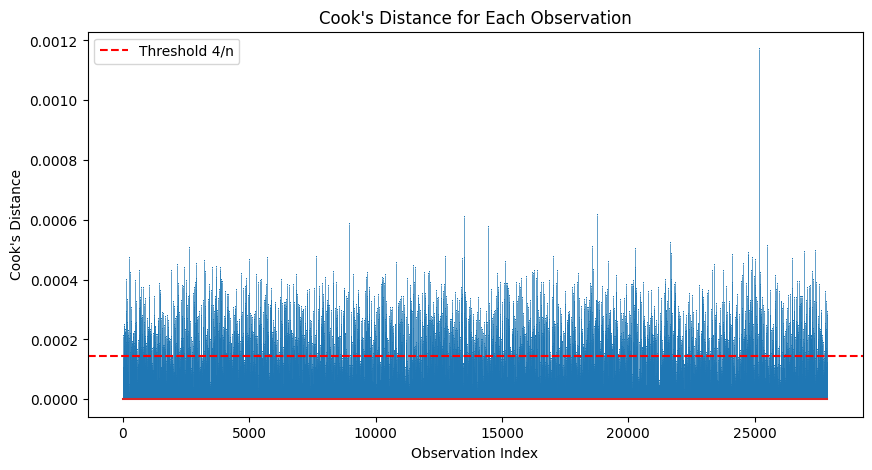

Influential points (Cook's D > 4/n): [   26    37    48 ... 27831 27863 27865]
2343

===== [4] Signifikansi Variabel (p-value) =====
                                              Coef.  Std.Err.          z  \
const                                     -2.480320  0.167582 -14.800623   
Age                                       -0.109904  0.004177 -26.313193   
Academic Pressure                          0.837785  0.014834  56.476327   
CGPA                                       0.061075  0.012350   4.945449   
Study Satisfaction                        -0.244431  0.013538 -18.055043   
Sleep Duration                            -0.186229  0.016234 -11.471852   
Dietary Habits                            -0.544358  0.023027 -23.640397   
Degree                                     0.003273  0.026507   0.123494   
Work/Study Hours                           0.117019  0.004963  23.576196   
Financial Stress                           0.554567  0.013319  41.638681   
Gender_Male                    

In [19]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt
from scipy import stats


df["Gender_Male"] = df["Gender_Male"].astype(int)
df["Have you ever had suicidal thoughts ?_Yes"] = df["Have you ever had suicidal thoughts ?_Yes"].astype(int)
df["Family History of Mental Illness_Yes"] = df["Family History of Mental Illness_Yes"].astype(int)

# Misal dataset kamu sudah preprocessed:
X = df.drop(columns=['Depression']).select_dtypes(include=np.number) # Select only numeric features
y = df['Depression']

# ====================
# 1. Cek Multikolinearitas (VIF)
# ====================
def calculate_vif(X):
    vif_df = pd.DataFrame()
    vif_df['feature'] = X.columns
    vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_df

# ====================
# 2. Box-Tidwell Test
# ====================
def box_tidwell_test(X, y, variables):
    X_bt = X.copy()
    for var in variables:
        # Add a small constant to avoid log(0) or log(negative)
        X_bt[var] = X_bt[var] + 1e-6  # or any small positive value
        X_bt[var + "_log"] = X_bt[var] * np.log(X_bt[var])
    X_bt = sm.add_constant(X_bt)
    model = sm.Logit(y, X_bt).fit(disp=0)
    p_values = model.pvalues[variables]  # ambil p-value variabel asli
    return p_values

# ====================
# 3. Cook's Distance
# ====================
def cooks_distance_check(X, y):
    X_cd = sm.add_constant(X)
    model = sm.Logit(y, X_cd).fit(disp=0)
    infl = model.get_influence()
    cooks_d = infl.cooks_distance[0]
    plt.figure(figsize=(10,5))
    # Check Matplotlib version and use appropriate stem plot call
    # if use_line_collection is not supported, use the older version

    #plt.stem(np.arange(len(cooks_d)), cooks_d, markerfmt=",", use_line_collection=True)
    markerline, stemlines, baseline = plt.stem(np.arange(len(cooks_d)), cooks_d, markerfmt=",") # Remove use_line_collection
    plt.setp(stemlines, 'linewidth', 0.5) # Optionally adjust linewidth for better visibility

    plt.axhline(4/len(X), color='r', linestyle='--', label='Threshold 4/n')
    plt.title("Cook's Distance for Each Observation")
    plt.xlabel("Observation Index")
    plt.ylabel("Cook's Distance")
    plt.legend()
    plt.show()
    # Return top influential points
    influential_points = np.where(cooks_d > 4/len(X))[0]
    return influential_points

# ====================
# 4. Signifikansi Variabel (p-value)
# ====================
def check_pvalues(X, y):
    X_pv = sm.add_constant(X)
    model = sm.Logit(y, X_pv).fit(disp=0)
    return model.summary2().tables[1]

# ====================
# Main Workflow
# ====================
def logistic_regression_assumption_check(X, y, variables_for_box_tidwell):
    print("\n===== [1] Cek Multikolinearitas (VIF) =====")
    vif_df = calculate_vif(X)
    print(vif_df)

    print("\n===== [2] Box-Tidwell Test (Age dan CGPA) =====")
    box_tidwell_pvalues = box_tidwell_test(X, y, variables_for_box_tidwell)
    print(box_tidwell_pvalues)

    print("\n===== [3] Cook's Distance Check (Analisis Outlier) =====")
    influential_points = cooks_distance_check(X, y)
    print(f"Influential points (Cook's D > 4/n): {influential_points}")
    print(len(influential_points))

    print("\n===== [4] Signifikansi Variabel (p-value) =====")
    pvalue_table = check_pvalues(X, y)
    print(pvalue_table)

# ====================
# Example usage:
# ====================

# Variabel numerik kontinu untuk Box-Tidwell
variables_for_box_tidwell = ['Age', 'CGPA']

# Jalanin
logistic_regression_assumption_check(X, y, variables_for_box_tidwell)

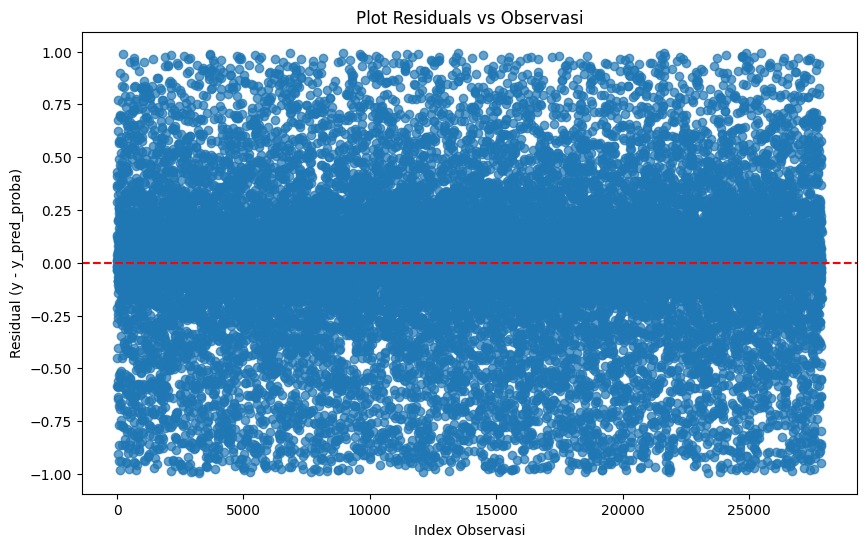

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression # Import LogisticRegression

# 1. Create and initialize the logistic regression model
log_reg = LogisticRegression() # Initialize log_reg

# 1. Fit model
log_reg.fit(X, y)

# 2. Predict probabilities
y_pred_proba = log_reg.predict_proba(X)[:,1]  # Probabilitas kelas 1

# 3. Hitung residual
residuals = y - y_pred_proba

# 4. Plot residuals vs urutan observasi
plt.figure(figsize=(10,6))
plt.scatter(np.arange(len(residuals)), residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Index Observasi')
plt.ylabel('Residual (y - y_pred_proba)')
plt.title('Plot Residuals vs Observasi')
plt.show()

In [21]:
import pandas as pd
from scipy.stats import chi2_contingency

# Asumsi:
# - X adalah dataset fitur
# - y adalah target

# Buat fungsi untuk uji chi-square
def chi_square_test(X, y, kategori_cols):
    hasil = []
    for col in kategori_cols:
        # Buat tabel kontingensi
        kontingensi = pd.crosstab(X[col], y)

        # Hitung chi-square
        chi2, p, dof, expected = chi2_contingency(kontingensi)

        hasil.append({
            'Fitur': col,
            'Chi2': chi2,
            'p-value': p
        })

    hasil_df = pd.DataFrame(hasil)
    return hasil_df.sort_values('p-value')

# Daftar fitur kategorik
kategori_cols = ['Academic Pressure', 'Study Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree', 'Work/Study Hours',
       'Financial Stress', 'Gender_Male',
       'Have you ever had suicidal thoughts ?_Yes',
       'Family History of Mental Illness_Yes']

# Jalankan Chi-Square Test
hasil_chi2 = chi_square_test(X, y, kategori_cols)

# Lihat hasil
print(hasil_chi2)


                                       Fitur         Chi2        p-value
0                          Academic Pressure  6418.433496   0.000000e+00
6                           Financial Stress  3698.104965   0.000000e+00
8  Have you ever had suicidal thoughts ?_Yes  8319.408238   0.000000e+00
5                           Work/Study Hours  1292.488171  2.069805e-269
3                             Dietary Habits  1204.355913  8.319821e-261
1                         Study Satisfaction   794.631871  1.677212e-169
4                                     Degree   339.908092   1.548444e-74
2                             Sleep Duration   277.176132   9.053487e-59
9       Family History of Mental Illness_Yes    79.382145   5.118661e-19
7                                Gender_Male     0.097821   7.544599e-01


# SPLITTING DATA

In [22]:
df_preprocessed = df.copy()

In [23]:
# Split Feature dan Label
X = df_preprocessed.drop(columns=['Depression'])
y = df_preprocessed['Depression']

# Standardisasi
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

# Split Train, Val, Test → 70/15/15
#X_temp, X_test, y_temp, y_test = train_test_split(X_scaled, y, test_size=0.15, random_state=42) # Use y instead of y_scaled
#X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1765, random_state=42)  # 0.1765 * 0.85 ≈ 0.15

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.8, random_state=42) # Use y instead of y_scaled


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27870 entries, 0 to 27900
Data columns (total 13 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Age                                        27870 non-null  float64
 1   Academic Pressure                          27870 non-null  float64
 2   CGPA                                       27870 non-null  float64
 3   Study Satisfaction                         27870 non-null  float64
 4   Sleep Duration                             27870 non-null  float64
 5   Dietary Habits                             27870 non-null  float64
 6   Degree                                     27870 non-null  int64  
 7   Work/Study Hours                           27870 non-null  float64
 8   Financial Stress                           27870 non-null  float64
 9   Depression                                 27870 non-null  int64  
 10  Gender_Male                

In [ ]:
print(X.dtypes)

Age                                          float64
Academic Pressure                            float64
CGPA                                         float64
Study Satisfaction                           float64
Sleep Duration                               float64
Dietary Habits                               float64
Degree                                         int64
Work/Study Hours                             float64
Financial Stress                             float64
Gender_Male                                    int64
Have you ever had suicidal thoughts ?_Yes      int64
Family History of Mental Illness_Yes           int64
dtype: object


In [32]:
# Set up for K-Fold Cross Validation
from sklearn.model_selection import KFold
kf = KFold(n_splits=5,shuffle=True, random_state=42)

# MODELLING LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression

# Fit model ke data training
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Hitung akurasi training
acc_train_lr = lr.score(X_train, y_train)
print("Training Accuracy:", acc_train_lr)

Training Accuracy: 0.8469680660208109


In [ ]:
#Hitung akurasi cross validation
#Evaluate the model using the number of k-folds
cv_scores_lr = cross_val_score(lr,X_train,y_train,cv=kf)
print(cv_scores_lr)

#Average the performance scores --> this is your model's performance metric
avg_lr = np.mean(cv_scores_lr)
print(avg_lr)

[0.85515695 0.83965015 0.84862077 0.83987441 0.85108769]
0.8468779925117438


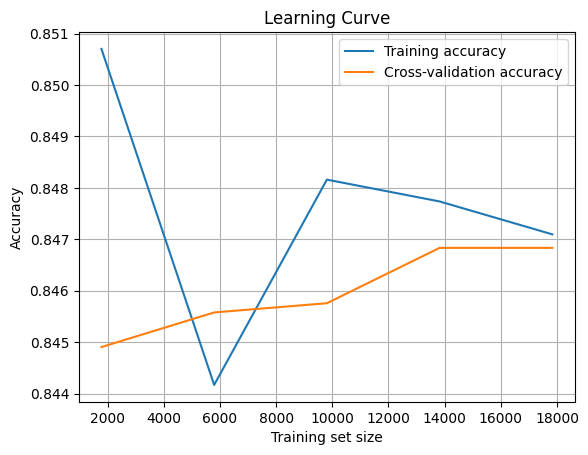

In [ ]:
train_sizes, train_scores_lr, val_scores_lr = learning_curve(
    lr, X_train, y_train, cv=kf, train_sizes=np.linspace(0.1, 1.0, 5)
)

train_mean_lr = np.mean(train_scores_lr, axis=1)
val_mean_lr = np.mean(val_scores_lr, axis=1)

plt.plot(train_sizes, train_mean_lr, label="Training accuracy")
plt.plot(train_sizes, val_mean_lr, label="Cross-validation accuracy")
plt.legend()
plt.xlabel("Training set size")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.grid(True)
plt.show()


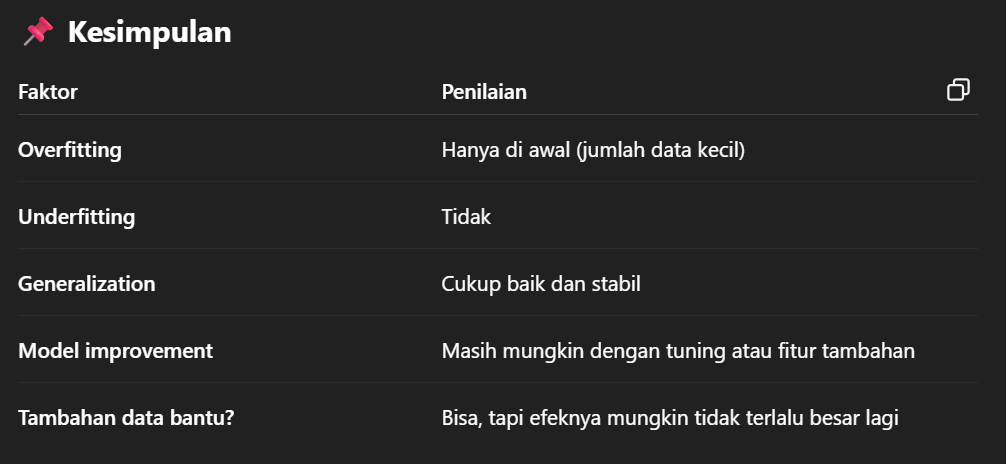

In [ ]:
# Prediksi dari data test
y_pred_lr = lr.predict(X_test)

# Evaluasi hasil
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy Test:", accuracy_score(y_test, y_pred_lr))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

Accuracy Test: 0.8469680660208109

Confusion Matrix:
 [[1844  503]
 [ 350 2877]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.79      0.81      2347
           1       0.85      0.89      0.87      3227

    accuracy                           0.85      5574
   macro avg       0.85      0.84      0.84      5574
weighted avg       0.85      0.85      0.85      5574



# MODELLING SVM

In [ ]:
# Cari nilai C dan Gammaa optimum
# define the parameter grid
param_grid = {'C': [0.01, 0.1],
              'gamma':[0.01, 0.1],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

svc = SVC()

# perform grid search
grid_search = GridSearchCV(svc,
                           param_grid,
                           cv=3,
                           n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_parameters = grid_search.best_params_

print('The best model was:', best_model)
print('The best parameter values were:', best_parameters)


The best model was: SVC(C=0.01, gamma=0.1, kernel='sigmoid')
The best parameter values were: {'C': 0.01, 'gamma': 0.1, 'kernel': 'sigmoid'}


## SVM SIGMOID

In [ ]:
# SVM Sigmoid (Data Training)
from sklearn.svm import SVC

clf_svm = SVC(kernel='sigmoid', C=0.1, gamma=0.01, random_state=42)

clf_svm.fit(X_train, y_train)

y_pred_train_svm = clf_svm.predict(X_train)
print("Accuracy Train:", metrics.accuracy_score(y_train, y_pred_train_svm))

Accuracy Train: 0.8466989594546107


In [ ]:
#Hitung akurasi cross validation
#Evaluate the model using the number of k-folds
cv_scores_svm = cross_val_score(clf_svm,X_train,y_train,cv=kf)
print(cv_scores_svm)

#Average the performance scores --> this is your model's performance metric
avg_svm = np.mean(cv_scores_svm)
print(avg_svm)

[0.85224215 0.84099574 0.84862077 0.84054721 0.85108769]
0.8466987108251866


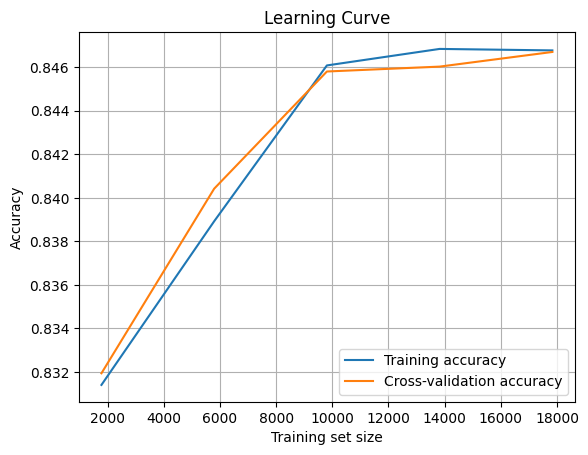

In [ ]:
train_sizes, train_scores_svm, val_scores_svm = learning_curve(
    clf_svm, X_train, y_train, cv=kf, train_sizes=np.linspace(0.1, 1.0, 5)
)

train_mean_svm = np.mean(train_scores_svm, axis=1)
val_mean_svm = np.mean(val_scores_svm, axis=1)

plt.plot(train_sizes, train_mean_svm, label="Training accuracy")
plt.plot(train_sizes, val_mean_svm, label="Cross-validation accuracy")
plt.legend()
plt.xlabel("Training set size")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.grid(True)
plt.show()


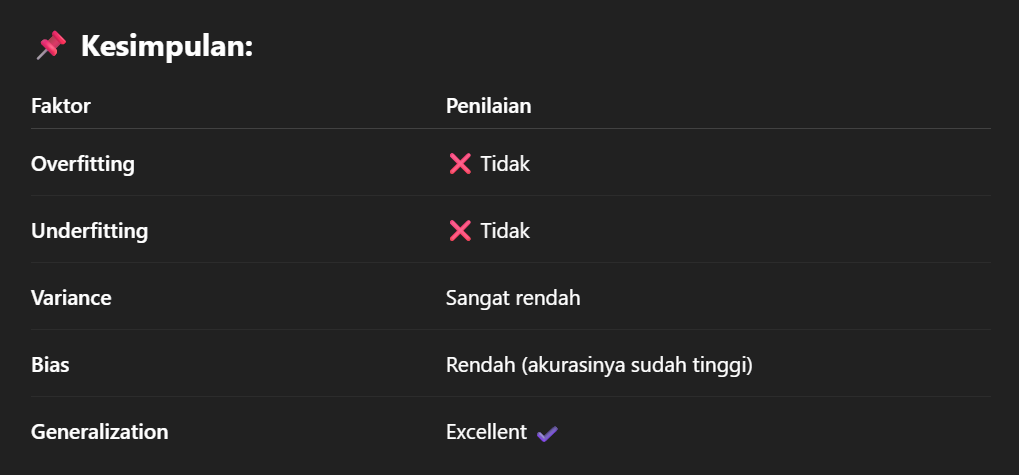

In [ ]:
# Prediksi dari data test
y_pred_svm = clf_svm.predict(X_test)

# Evaluasi hasil
print("Accuracy Test:", accuracy_score(y_test, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

Accuracy Test: 0.844994617868676

Confusion Matrix:
 [[1807  540]
 [ 324 2903]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.77      0.81      2347
           1       0.84      0.90      0.87      3227

    accuracy                           0.84      5574
   macro avg       0.85      0.83      0.84      5574
weighted avg       0.85      0.84      0.84      5574



# MODELLING XGBOOST

In [24]:
from xgboost import XGBClassifier as xgb
import xgboost as xgb

In [25]:
# from xgboost import XGBClassifier as xgb # Import XGBClassifier directly

# Define the hyperparameter grid
param_grid = {
    'max_depth': [2, 3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.2, 0.5, 0.7, 1]
}

# Create the XGBoost model object
xgb_model = xgb.XGBClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(xgb_model, param_grid, cv=7, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best set of hyperparameters:  {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5}
Best score:  0.8479098044300396


In [28]:
# Train ulang model dengan best hyperparameter
best_params = grid_search.best_params_

clf_xgb = xgb.XGBClassifier(
    max_depth=best_params['max_depth'],
    learning_rate=best_params['learning_rate'],
    subsample=best_params['subsample'],
    use_label_encoder=True,
    eval_metric='logloss'
)

In [29]:
# XGBoost (Data Training)
clf_xgb.fit(X_train, y_train)

y_pred_train_xgb = clf_xgb.predict(X_train)
print("Accuracy Train:", metrics.accuracy_score(y_train, y_pred_train_xgb))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:18:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy Train: 0.852081090778615


In [30]:
import warnings
warnings.filterwarnings('ignore')

In [33]:
#Hitung akurasi cross validation
#Evaluate the model using the number of k-folds
cv_scores_xgb = cross_val_score(clf_xgb,X_train,y_train,cv=kf)
print(cv_scores_xgb)

#Average the performance scores --> this is your model's performance metric
avg_xgb = np.mean(cv_scores_xgb)
print(avg_xgb)

[0.8544843  0.84211707 0.84951783 0.8425656  0.85063916]
0.8478647910157017


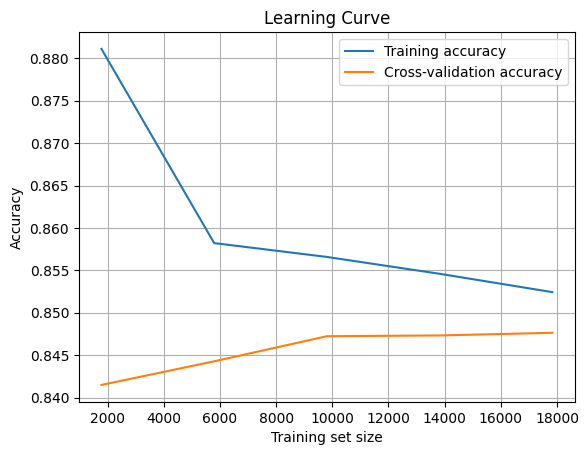

In [34]:
train_sizes, train_scores_xgb, val_scores_xgb = learning_curve(
    clf_xgb, X_train, y_train, cv=kf, train_sizes=np.linspace(0.1, 1.0, 5)
)

train_mean_xgb = np.mean(train_scores_xgb, axis=1)
val_mean_xgb = np.mean(val_scores_xgb, axis=1)

plt.plot(train_sizes, train_mean_xgb, label="Training accuracy")
plt.plot(train_sizes, val_mean_xgb, label="Cross-validation accuracy")
plt.legend()
plt.xlabel("Training set size")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.grid(True)
plt.show()



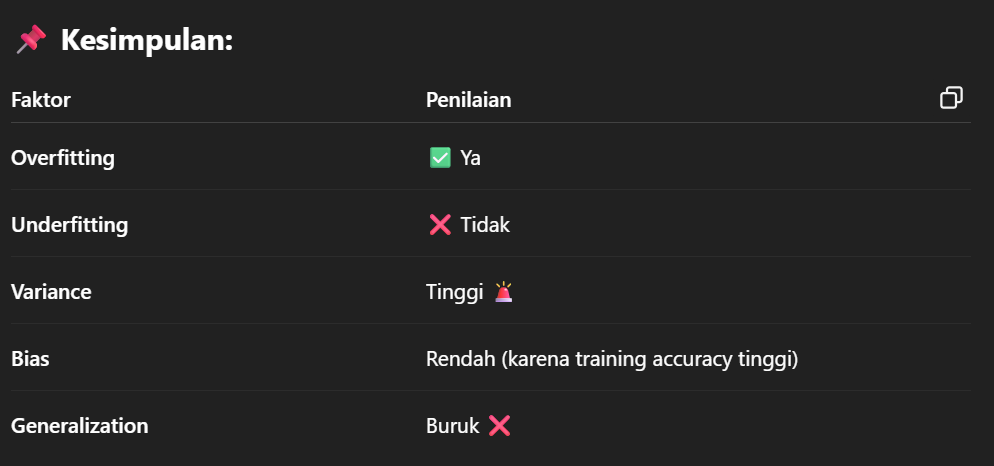

In [ ]:
# Prediksi dari data test
y_pred_xgb = clf_xgb.predict(X_test)

# Evaluasi hasil
print("Accuracy Test:", accuracy_score(y_test, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

Accuracy Test: 0.8476856835306782

Confusion Matrix:
 [[1844  503]
 [ 346 2881]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.79      0.81      2347
           1       0.85      0.89      0.87      3227

    accuracy                           0.85      5574
   macro avg       0.85      0.84      0.84      5574
weighted avg       0.85      0.85      0.85      5574

